<font size=8 face=雅黑>====</font><br /><br />
<font size=8 face=雅黑>學習問題-動態規劃</font><br /><br />
<font size=4 face=雅黑>由這個題目告訴我們位置A為起點而位置E為終點</font>

![caption](files/picture1.png)

<font size=4 face=雅黑>首先決定狀態，而我們總共有五個狀態，分別為A、B、C、D和E</font>

In [1]:
import matplotlib.pyplot as plt

mark=['A','B','C','D','E']
Yrangep=[2,1.5,1,0.5,0]

for i in range(0,5):
    plt.plot(0,Yrangep[i],'o',markerfacecolor='none',markersize=22)
    plt.text(-.0125,Yrangep[i]-.09,mark[i],fontsize=24)
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

<font size=4 face=雅黑>接著我們可以把狀態轉換圖找出來</font>

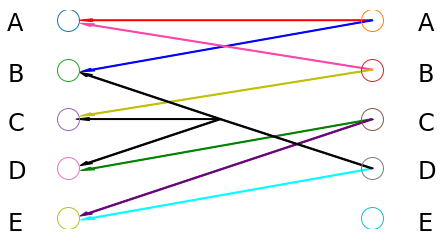

In [2]:
import matplotlib.pyplot as plt
Xrangep=[0,1]
Xranget=[-0.2,1.15]
Yrangep=[2,1.5,1,0.5,0]
Yranget=[1.89,1.38,0.88,0.4,-0.13]

mark=['A','B','C','D','E']

for i in range(0,5):
    plt.plot(Xrangep[0],Yrangep[i],'o',markerfacecolor='none',markersize=22)
    plt.plot(Xrangep[1],Yrangep[i],'o',markerfacecolor='none',markersize=22)
    plt.text(Xranget[0],Yranget[i],mark[i],fontsize=24)
    plt.text(Xranget[1],Yranget[i],mark[i],fontsize=24)
    plt.axis('off')
    if i == 0:
        plt.arrow(1,2,-0.92,0,width=0.01,color='r')
        plt.arrow(1,2,-.92,-0.5,width=0.01,color='b')
    elif i == 1:
        plt.arrow(1,1.5,-.92,0.45,width=0.01,color='#FF44AA')
        plt.arrow(1,1.5,-.92,-0.45,width=0.01,color='y')
    elif i == 2:
        plt.arrow(1,1,-.92,-0.5,width=0.01,color='g')
        plt.arrow(1,1,-.93,-0.95,width=0.01,color='#660077')
    elif i == 3:
        plt.arrow(1,0.5,-.92,-.5,width=0.01,color='#00FFFF')
        plt.arrow(1,0.5,-.5,0.5,head_width=0, head_length=0,width=0.01,color='k')
        plt.arrow(.5,1,-.43,0.44,width=0.01,color='k')
        plt.arrow(.5,1,-.43,.0,width=0.01,color='k')
        plt.arrow(.5,1,-.43,-0.44,width=0.01,color='k')

<font size=4 face=雅黑>雖然我們一開始不會知道哪一條為最佳路徑，但是我們可以知道我們的終點為位置E，因此位置E設成0而其他四點設為-100以方便運算。</font>
<font size=4 face=雅黑>方便計算所以我們把各點的aciton標示出來。</font>
![caption](files/picture2.png)

In [3]:
import random
import numpy as np
#狀態
states=["A", "B","C","D","E"]

#動作
'''
action
A : facebook=0, quit=1, B : study=0, facebook=1, C : study=0, sleep=1, D : pub=0, study=1, E : 0
'''
actions=['0','1']

# 獎勵的折扣因子
gama=1

#狀態值
v_value={"A":-100,"B":-100,"C":-100,"D":-100,"E":0}

#動作值 
q_value={}

'''
p_state_reward={('states','actions'):(probabity,next state,reward)}
next state: 0=A, 1=B, 2=C, 3=D, 4=E,
'''
p_state_reward={
    ("A", "0"):(1, 0, -1),
    ("A", "1"):(1, 1, 0),
    ("B", "0"):(1, 2, -2),
    ("B", "1"):(1, 0, -1),
    ("C", "0"):(1, 3, -2),
    ("C", "1"):(1, 4, 0),
    ("D", "0"):((0.2, 1, 1),(0.4, 2,1),(0.4,3,1)),
    ("D", "1"):(1,4,10),
    ("E", "0"):((1,4,0)),
    }

# q_table 初始值
q_value={
    ("A", "0"):0,
    ("A", "1"):0,
    ("B", "0"):0,
    ("B", "1"):0,
    ("C", "0"):0,
    ("C", "1"):0,
    ("D", "0"):0,
    ("D", "1"):0,
    ("E", "0"):0,
}

#計算q_value
def q_value_fun():
    #將dict(dictionary)放入list
    v_value_list=[v_value['A'],v_value['B'],v_value['C'],v_value['D'],v_value['E']]

    #將q_value拆成key,value ("key[0],key[1]"):value
    for key, value in q_value.items():
        t_list = np.array([0,0,0], dtype=int)
        #加上count讓t可以放入t_list對應位置
        count = 0
        for t in p_state_reward[key[0],key[1]]: #key[0]=state, key[1]=action
            if key == ('D','0'):
                q_value[key] = 1+0.2*v_value_list[1]+0.4*v_value_list[2]+0.4*v_value_list[3]
            else:           
                t_list[count]=t
                count+=1
                q_value[key] = int(t_list[0]*(gama*v_value_list[t_list[1]]+t_list[2]))

def pi_fun():
    
    pi = {}
    for state in states:
        temp={}
        if state == 'E':
            temp[0] = 1.0
            pi[state]=temp
        else:
            act=max((q_value[(state, action)],action) for action in actions)[-1]
            for action in actions:
                if action==act:
                    temp[action]=1.0
                else:
                    temp[action]=0.0    
            pi[state]=temp
    print(pi)
                

def value_iteration():
    
    global v_value
    flag=True
    q_value_fun()  
    v_value_new=v_value
    
    v_value={"A":max(q_value['A','0'],q_value['A','1']),
             "B":max(q_value['B','0'],q_value['B','1']),
             "C":max(q_value['C','0'],q_value['C','1']),
             "D":max(q_value['D','0'],q_value['D','1']),
             "E":q_value['E','0'],
            }     
    
    X=v_value['A']-v_value_new['A'],
    Y=v_value['B']-v_value_new['B'],
    Z=v_value['C']-v_value_new['C'],
    W=v_value['D']-v_value_new['D'],
    A = X+Y+Z+W   
    
    if abs(sum(A)) > 0.0001:
        flag=False      
        v_value_new=v_value

    return flag

def valueEval():
    i=1
    flag=value_iteration()
    while flag!=True:
        i+=1
        flag=value_iteration()
        
        
    print('總共運行次數:'+str(i)+'\n')
    print('狀態值為：')
    print(v_value)
    print('')
    print('行動值為：')
    print(q_value)
    print('')
    print('決策為：')
    pi_fun()


valueEval()



總共運行次數:5

狀態值為：
{'A': 6, 'C': 8, 'B': 6, 'E': 0, 'D': 10}

行動值為：
{('A', '0'): 5, ('C', '1'): 0, ('A', '1'): 6, ('D', '1'): 10, ('B', '1'): 5, ('D', '0'): 9.4, ('B', '0'): 6, ('E', '0'): 0, ('C', '0'): 8}

決策為：
{'A': {'1': 1.0, '0': 0.0}, 'C': {'1': 0.0, '0': 1.0}, 'B': {'1': 0.0, '0': 1.0}, 'E': {0: 1.0}, 'D': {'1': 1.0, '0': 0.0}}


<font size=4 face=雅黑>最後我們可以透過運算來進行Trace Back</font><br />

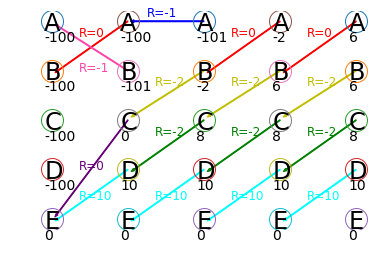

In [4]:
import matplotlib.pyplot as plt

X=[-100,-100,-100,-100,0]
Xrangep=[0,1,2,3,4]
Yrangep=[2,1.5,1,0.5,0]
count = 5
mark=['A','B','C','D','E']
for i in range(0,count):
    for j in range(0,5):
        plt.plot(Xrangep[i],Yrangep[j],'o',markerfacecolor='none',markersize=22)
        plt.text(Xrangep[i]-0.1,Yrangep[j]-0.09,mark[j],fontsize=24)
        plt.axis('off')
    A = max(X[0]+(-1),X[1])
    if i < count-1:
        if X[0]+(-1) >= X[1]:
            plt.arrow(Xrangep[i]+1,Yrangep[1]+0.5,-0.92,0,width=0.01,color='b')
            plt.text((Xrangep[i]+1.5)*0.5,Yrangep[0]+0.05,'R=-1',fontsize=12,color='b')
        else:
            plt.arrow(Xrangep[i]+1,Yrangep[1]+0.5,-0.92,-.5,width=0.01,color='r')
            plt.text(Xrangep[i]+0.35,Yrangep[1]+0.35,'R=0',fontsize=12,color='r')
            
    B = max(X[2]-2,X[0]-1)
    if i < count-1:
        if X[0]-1>X[2]-2:
            plt.arrow(Xrangep[i]+1,Yrangep[1],-.92,0.45,width=0.01,color='#FF44AA')
            plt.text(Xrangep[i]+0.35,Yrangep[1],'R=-1',fontsize=12,color='#FF44AA')
        else:
            plt.arrow(Xrangep[i]+1,Yrangep[1],-.92,-0.45,width=0.01,color='y')
            plt.text(Xrangep[i]+0.35,Yrangep[2]+0.35,'R=-2',fontsize=12,color='y')

    C = max(X[4]+0,X[3]-2)
    if i < count-1:
        if X[3]-2>X[4]:
            plt.arrow(Xrangep[i]+1,Yrangep[2],-.92,-0.5,width=0.01,color='g')
            plt.text(Xrangep[i]+0.35,Yrangep[3]+0.35,'R=-2',fontsize=12,color='g')
        else:
            plt.arrow(Xrangep[i]+1,Yrangep[2],-.93,-0.95,width=0.01,color='#660077')
            plt.text(Xrangep[i]+0.35,Yrangep[3],'R=0',fontsize=12,color='#660077')
        
    D = max(X[4]+10,0.2*X[1]+0.4*X[2]+0.4*X[3]+1)
    if i < count-1:
        if X[4]+10>0.2*X[1]+0.4*X[2]+0.4*X[3]+1:
            plt.arrow(Xrangep[i]+1,Yrangep[3],-.92,-.5,width=0.01,color='#00FFFF')
            plt.text(Xrangep[i]+0.35,Yrangep[4]+0.2,'R=10',fontsize=12,color='#00FFFF')
        else:
            plt.arrow((Xrangep[i]+1),Yrangep[3],-.5,0.5,width=0.01,color='k')
            plt.arrow((Xrangep[i]+1)*0.5,Yrangep[2],-.43,0.44,width=0.01,color='k')
            plt.arrow((Xrangep[i]+1)*0.5,Yrangep[2],-.43,.0,width=0.01,color='k')
            plt.arrow((Xrangep[i]+1)*0.5,Yrangep[2],-.43,-0.44,width=0.01,color='k')
    for k in range(0,5):
        plt.text(Xrangep[i]-0.1,Yrangep[k]-0.2,X[k],fontsize=14)
    E = 0
    X = [A,B,C,D,E]


<font size=4 face=雅黑>留下我們所需要的。</font>

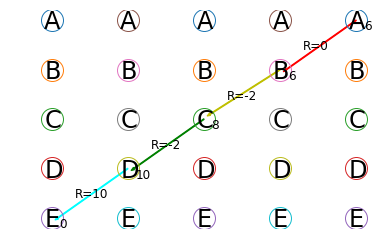

In [5]:
import matplotlib.pyplot as plt

X=[-100,-100,-100,-100,0]
Xrangep=[0,1,2,3,4]
Yrangep=[2,1.5,1,0.5,0]
count = 5
mark=['A','B','C','D','E']
for i in range(0,count):
    for j in range(0,5):
        plt.plot(Xrangep[i],Yrangep[j],'o',markerfacecolor='none',markersize=22)
        plt.text(Xrangep[i]-0.1,Yrangep[j]-0.09,mark[j],fontsize=24)
        plt.axis('off')

plt.arrow(+1,Yrangep[3],-.92,-.5,width=0.01,color='#00FFFF')
plt.text(0.3,0.2,'R=10',fontsize=12,color='k')        
plt.arrow(2,Yrangep[2],-.92,-0.5,width=0.01,color='g')
plt.text(1.3,0.7,'R=-2',fontsize=12,color='k')
plt.arrow(3,Yrangep[1],-.92,-0.45,width=0.01,color='y')
plt.text(2.3,1.2,'R=-2',fontsize=12,color='k')
plt.arrow(4,Yrangep[1]+0.5,-0.92,-.5,width=0.01,color='r')
plt.text(3.3,1.7,'R=0',fontsize=12,color='k');
            
plt.text(4.1,1.9,'6',fontsize=12,color='k');
plt.text(3.1,1.4,'6',fontsize=12,color='k');
plt.text(2.1,0.9,'8',fontsize=12,color='k');
plt.text(1.1,0.4,'10',fontsize=12,color='k');
plt.text(.1,-.1,'0',fontsize=12,color='k');

<font size=4 face=雅黑>以下為各次的狀態值、動作值和決策。</font>

In [6]:
import random
import numpy as np
#狀態
states=["A", "B","C","D","E"]

#動作
actions=['0','1']

# 獎勵的折扣因子
gama=1

#狀態值
v_value={"A":-100,"B":-100,"C":-100,"D":-100,"E":0}

#動作值 ("1", "a"):0
q_value={}

p_state_reward={
    ("A", "0"):(1, 0, -1),
    ("A", "1"):(1, 1, 0),
    ("B", "0"):(1, 2, -2),
    ("B", "1"):(1, 0, -1),
    ("C", "0"):(1, 3, -2),
    ("C", "1"):(1, 4, 0),
    ("D", "0"):((0.2, 1, 1),(0.4, 2,1),(0.4,3,1)),
    ("D", "1"):(1,4,10),
    ("E", "0"):((1,4,0)),
    }

# q_table 初始值
q_value={
    ("A", "0"):0,
    ("A", "1"):0,
    ("B", "0"):0,
    ("B", "1"):0,
    ("C", "0"):0,
    ("C", "1"):0,
    ("D", "0"):0,
    ("D", "1"):0,
    ("E", "0"):0,
}

def q_value_fun():
    
    v_value_string=[v_value['A'],v_value['B'],v_value['C'],v_value['D'],v_value['E']]

    for key, value in q_value.items():
        t_string = np.array([0,0,0], dtype=int)
        count = 0
        for t in p_state_reward[key[0],key[1]]: #key[0]=state, key[1]=action
            if key == ('D','0'):
                q_value[key] = 1+0.2*v_value_string[1]+0.4*v_value_string[2]+0.4*v_value_string[3]
            else:           
                t_string[count]=t
                count+=1
                q_value[key] = int(t_string[0]*(gama*v_value_string[t_string[1]]+t_string[2]))

def pi_fun():
    
    pi = {}
    for state in states:
        temp={}
        if state == 'E':
            temp[0] = 1.0
            pi[state]=temp
        else:
            act=max((q_value[(state, action)],action) for action in actions)[-1]
            for action in actions:
                if action==act:
                    temp[action]=1.0
                else:
                    temp[action]=0.0    
            pi[state]=temp
    print(pi)
                

def value_iteration():
    
    global v_value
    flag=True
    q_value_fun()  
    v_value_new=v_value
    
    v_value={"A":max(q_value['A','0'],q_value['A','1']),
             "B":max(q_value['B','0'],q_value['B','1']),
             "C":max(q_value['C','0'],q_value['C','1']),
             "D":max(q_value['D','0'],q_value['D','1']),
             "E":q_value['E','0'],
            }     
    
    X=v_value['A']-v_value_new['A'],
    Y=v_value['B']-v_value_new['B'],
    Z=v_value['C']-v_value_new['C'],
    W=v_value['D']-v_value_new['D'],
    A = X+Y+Z+W   
    
    if abs(sum(A)) > 0.0001:
        flag=False      
        v_value_new=v_value

    return flag


def valueEval():
    i=1
    flag=value_iteration()
    print('第'+str(i)+'次')
    print('狀態值為：')
    print(v_value)
    print('')
    print('行動值為：')
    print(q_value)
    print('')
    print('決策為：')
    pi_fun()
    print('')    
    
    while flag!=True:
        i+=1
        flag=value_iteration()
        print('第'+str(i)+'次')
        print('狀態值為：')
        print(v_value)
        print('')
        print('行動值為：')
        print(q_value)
        print('')
        print('決策為：')
        pi_fun()
        print('')


valueEval()



第1次
狀態值為：
{'A': -100, 'C': 0, 'B': -101, 'E': 0, 'D': 10}

行動值為：
{('A', '0'): -101, ('C', '1'): 0, ('A', '1'): -100, ('D', '1'): 10, ('B', '1'): -101, ('D', '0'): -99.0, ('B', '0'): -102, ('E', '0'): 0, ('C', '0'): -102}

決策為：
{'A': {'1': 1.0, '0': 0.0}, 'C': {'1': 1.0, '0': 0.0}, 'B': {'1': 1.0, '0': 0.0}, 'E': {0: 1.0}, 'D': {'1': 1.0, '0': 0.0}}

第2次
狀態值為：
{'A': -101, 'C': 8, 'B': -2, 'E': 0, 'D': 10}

行動值為：
{('A', '0'): -101, ('C', '1'): 0, ('A', '1'): -101, ('D', '1'): 10, ('B', '1'): -101, ('D', '0'): -15.200000000000003, ('B', '0'): -2, ('E', '0'): 0, ('C', '0'): 8}

決策為：
{'A': {'1': 1.0, '0': 0.0}, 'C': {'1': 0.0, '0': 1.0}, 'B': {'1': 0.0, '0': 1.0}, 'E': {0: 1.0}, 'D': {'1': 1.0, '0': 0.0}}

第3次
狀態值為：
{'A': -2, 'C': 8, 'B': 6, 'E': 0, 'D': 10}

行動值為：
{('A', '0'): -102, ('C', '1'): 0, ('A', '1'): -2, ('D', '1'): 10, ('B', '1'): -102, ('D', '0'): 7.800000000000001, ('B', '0'): 6, ('E', '0'): 0, ('C', '0'): 8}

決策為：
{'A': {'1': 1.0, '0': 0.0}, 'C': {'1': 0.0, '0': 1.0}, 'B': {'1